In [130]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [131]:
spotify_g = pd.read_csv('genres_v2.csv')

/Users/PJMoon/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [132]:
spotify_p = pd.read_csv('playlists.csv')

In [133]:
spotify_g.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

I will focus on the tempo variable which gives the beats per minute (bpm) of each song

In [134]:
population = spotify_g['tempo']

In [135]:
population

0        156.985
1        115.080
2        218.050
3        186.948
4        147.988
          ...   
42300    150.013
42301    149.928
42302    154.935
42303    150.042
42304    155.047
Name: tempo, Length: 42305, dtype: float64

In [136]:
#define a funtion that calculates a statistic for our sampling and population distributions
def choose_statistics(x,sample_stat_text):
    if sample_stat_text == 'Mean':
        return np.mean(x)
    elif sample_stat_text == 'Minimum':
        return np.min(x)
    elif sample_stat_text == 'Maximum':
        return np.max(x)
    elif sample_stat_text == 'Variance':
        return np.var(x,ddof=1)
    else:
        raise Exception('Make sure to input from "Mean","Minimum","Maximum","Variance"')

        
#define a funtion that plots the population distribution of a dataframe 
def population_distribution(population_data):
    sns.histplot(population_data, stat = 'density')
    plt.title(f"Population Distribution")
    plt.xlabel('')
    plt.show()
    plt.clf()
    

#define a function that plots a simulated sampling distribution of a statistic
def sampling_distribution(population_data,sample_size,stat):
    sample_stats = []
    for i in range(500):
        samp = np.random.choice(population_data,sample_size,replace= False)
        sample_stat = choose_statistics(samp,stat)
        sample_stats.append(sample_stat)
    
    pop_statistic = round(choose_statistics(population_data,stat),2)
    
    sns.histplot(sample_stats,stat='density')
    plt.title(f"Sampling Distribution of the {stat}\nMean of the sample {stat}s: {round(np.mean(sample_stat),2)}\n Population {stat}: {pop_statistic}")
    plt.axvline(pop_statistic, color='g',linestyle = 'dashed',label=f'Population {stat}')
    plt.axvline(np.mean(sample_stats),color='orange',linestyle = 'dashed', label=f'Mean of the sample {stat}s')
    plt.legend()
    plt.show()
    plt.clf()

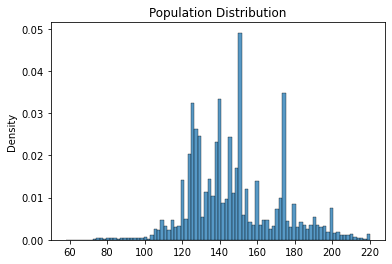

<Figure size 432x288 with 0 Axes>

In [137]:
song_tempos = population_distribution(population)

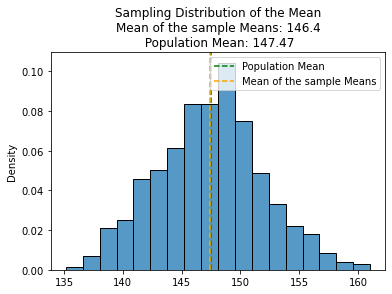

<Figure size 432x288 with 0 Axes>

In [138]:
sampling_distribution(population,30,'Mean')

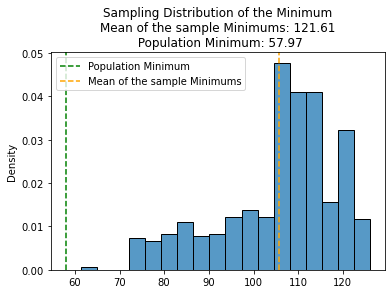

<Figure size 432x288 with 0 Axes>

In [139]:
sampling_distribution(population,30,'Minimum')

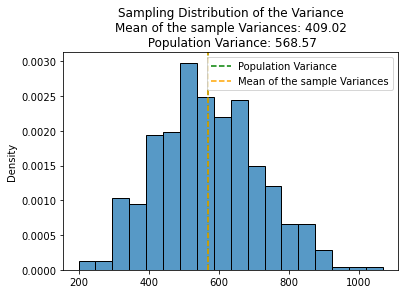

<Figure size 432x288 with 0 Axes>

In [140]:
sampling_distribution(population,30,'Variance')

In [141]:
song_tempos

In [142]:
population_mean = np.mean(population)
population_std = np.std(population)
sample_standard_deviation = population_std/(30**.5)

Probability that the sample mean of 30 selected songs is less than 140 bpm (This will 

In [143]:
print(stats.norm.cdf(140,population_mean,sample_standard_deviation))

0.043003550159626626


In [145]:
print(1- stats.norm.cdf(150,population_mean,sample_standard_deviation))

0.2808802810180707
